## Part A

### Problem Statement
• DOMAIN: Automobile 

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. 

• DATA DESCRIPTION: 

    cylinders: multi-valued discrete 
    acceleration: continuous 
    displacement: continuous 
    model year: multi-valued discrete
    horsepower: continuous 
    origin: multi-valued discrete
    weight: continuous 
    car name: string (unique for each instance)
    mpg: continuous

• PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [491]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

#### Q1. Data Understanding & Exploration: [5 Marks] 

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

D. Print 5 point summary of the numerical features and share insights. [1 Marks]

In [492]:
# QA 1 A: Read ‘Car name.csv’ as a DataFrame and assign it to a variable.
car_name= pd.read_csv('Car name.csv')
car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [493]:
# QA 1 B: Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.
car_attr =pd.read_json('Car-Attributes.json')
car_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [494]:
# QA 1 C: Merge both the DataFrames together to form a single DataFrame

Before merging, we need to check the size of the dataframes and the number of rows should be same. One dataframe contains just the car names & other dataframe contains the attributes of those cars.

In [495]:
print(car_name.shape)
print(car_attr.shape)

(398, 1)
(398, 8)


As the no of rows is same in both the dataframes, we can merge them.

In [496]:
car_df= pd.concat([car_name,car_attr],axis=1)
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [497]:
# QA 1 D: Print 5 point summary of the numerical features and share insights.
car_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


##### Insights:
mpg: The mean is ~24, min & max are 9 & 46 respectively. \
cyl: Mean is ~ 5, min & max are 3 & 8 respectively. \
disp: Mean is ~ 193, min & max are 68 & 455 respectively. \
wt: Mean is 2970, min & max are 1613 & 5140 respectively \
acc: Mean is 15.5, min & max are 8 & 24 respectively \
yr: Mean is 76, min & max are 70 & 82 respectively \
origin: Mean is 1.57, min & max are 1 & 3 respectively \
Cylinder, Year & Origin are discrete values and not continous. \
hp values were numeric but it doesn't show up here, may be it has some unexpected/blank values due to which it is not a numeric data type. \
We also notice that in most of the columns mean & median are very close which mean data is not heavily skewed.

#### Q2. Data Preparation & Analysis: [10 Marks] 
A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

C. Plot a pairplot for all features. [1 Marks]

D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

E. Share insights for Q2.d. [1 Marks]

F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

G. Share insights for Q2.f. [1 Marks]

H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]

    [Hint: ‘?’ is present in ‘hp’]

In [498]:
# QA 2 A: Check & print feature-wise percentage of missing values present in data. Impute with the best suitable approach.
car_df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [499]:
car_df.isna().sum()/len(car_df)*100 #taking percent

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

There is no missing value in the data.

In [500]:
# QA 2 B: Check for duplicate values in the data and impute with the best suitable approach.
car_df.duplicated().sum()

0

There is no duplicate values in the data.

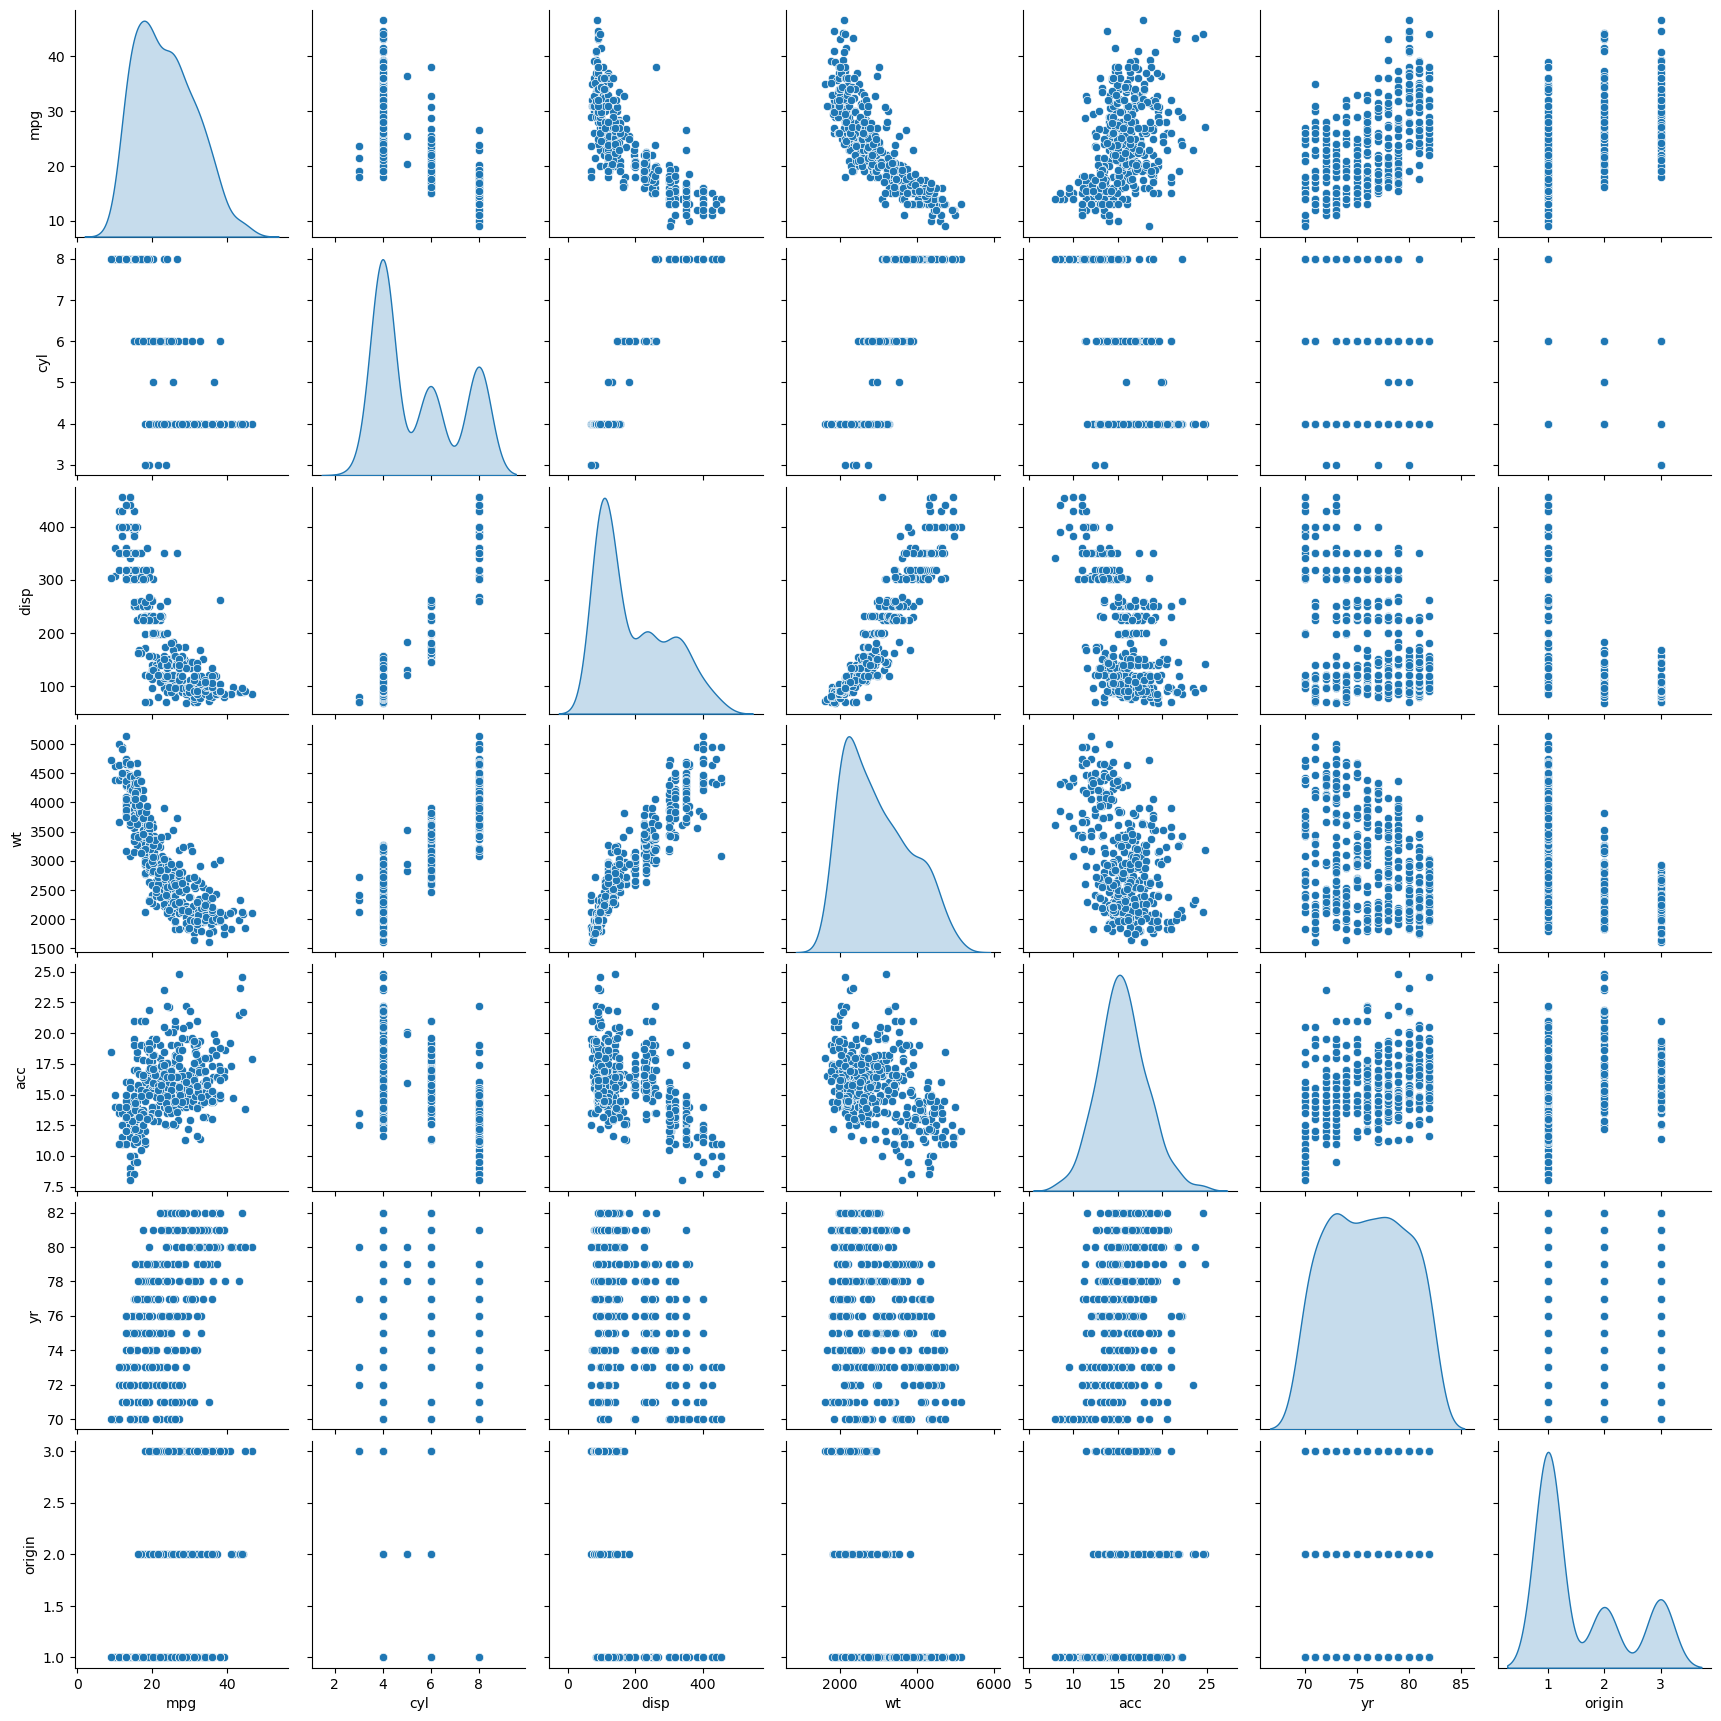

In [501]:
# QA 2 C: Plot a pairplot for all features.
sns.pairplot(car_df,diag_kind = 'kde')

The pair plot clearly shows the \
Positive correlation between: 

    disp & wt
    mpg & acc
    cyl & disp

Negative correlation between:

    disp & mpg
    wt & mpg
    disp & acc
    wt & acc

<Axes: xlabel='wt', ylabel='disp'>

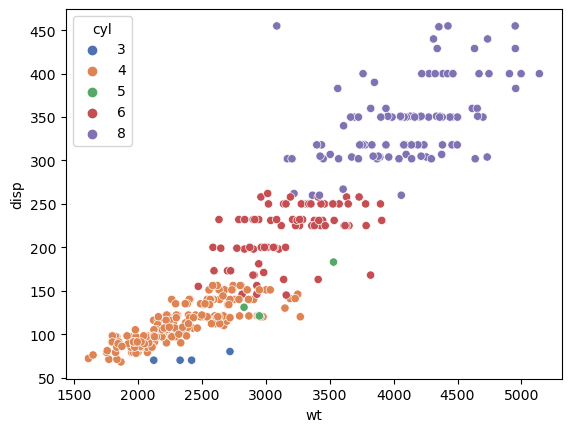

In [502]:
# QA 2 D: Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(car_df,x= 'wt',y='disp',hue= 'cyl',palette= 'deep')

In [503]:
# QA 2 E: Share insights for Q2.d.

The scatterplot shows that wt & disp are positively correlated i.e. As wt increases, disp increases. \
The chart also shows that the cars with less numbers of cylinder (such as 3 & 4) have comparitively lesser weight & hence lesser displacement. \
The cars having higher number of cylinder gradually increases in weight & displacement which is verly clearly shown in the chart. The cars with 8 cylinders have highest wt & disp.

<Axes: xlabel='wt', ylabel='mpg'>

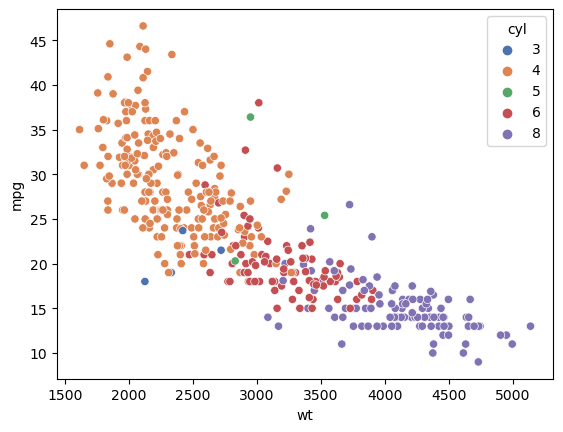

In [504]:
# QA 2 F: Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(car_df,x= 'wt',y='mpg',hue= 'cyl',palette= 'deep')

In [505]:
# QA 2 G: Share insights for Q2.f.

The scatter plot shows that wt & mpg are negatively correlated i.e As wt increases, mpg decreases. \
It also shows that the cars with lesser number of cylinders have less weight as well as less mpg. As the number of cylinder increases, weight & mpg decreases.

In [506]:
# QA 2 H: Check for unexpected values in all the features and datapoints with such values.
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


By passing info(),I can notice all the columns looks good as per the values except 'hp'. In column 'hp', I can see the values as float data type but its showing up as object which means there is some unexpected values. I will run a for loop to see all the unique values in the columns. 

In [507]:
pd.set_option("display.max_rows", None)  #To display all the value_counts() results
columns= car_df.columns
for i in car_df[columns]:
    print('Unique values in {} are \n'.format(i),car_df[i].value_counts())
    print(i)
    print('*'*15)

Unique values in car_name are 
 ford pinto                              6
toyota corolla                          5
amc matador                             5
ford maverick                           5
chevrolet chevette                      4
amc gremlin                             4
chevrolet impala                        4
peugeot 504                             4
amc hornet                              4
toyota corona                           4
ford gran torino                        3
chevrolet caprice classic               3
honda civic                             3
volkswagen dasher                       3
dodge colt                              3
chevrolet citation                      3
chevrolet nova                          3
pontiac catalina                        3
plymouth fury iii                       3
ford galaxie 500                        3
chevrolet vega                          3
plymouth duster                         3
amc matador (sw)                        2
vo

The column 'hp' has 6 observations with the value as ?, which is around 1.5% of total data values. This is an unexpected value that needs to be imputed. Lets check the observations where the data is unexepected. It can be either dropped or can be imputed with mean/median. Here as its just 1.5% of entire data, I am preffering to drop it off.

In [508]:
car_df= car_df.replace('?', np.nan) #replacing ? with nulls
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [509]:
car_df= car_df.dropna().reset_index(drop=True) #dropping nulls
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 27.7+ KB


In [510]:
car_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### Q3. Clustering: [15 Marks] 

A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

B. Plot a visual and find elbow point. [2 Marks]

C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [511]:
# QA 3 A: Apply K-Means clustering for 2 to 10 clusters.

#scaling the data
car_df_attr=car_df.iloc[:,1:]
car_df_scaled=car_df_attr.apply(zscore)
car_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [515]:
#Applying K means
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model_kmeans=KMeans(n_clusters=k)
    model_kmeans.fit(car_df_scaled)
    prediction=model_kmeans.predict(car_df_scaled)
    meanDistortions.append(sum(np.min(cdist(car_df_scaled, model_kmeans.cluster_centers_, 'euclidean'), axis=1)) / car_df_scaled.shape[0])

meanDistortions


[1.9091840803351565,
 1.628758749472895,
 1.4757295853545427,
 1.3336142756495504,
 1.2781407212911924,
 1.217012125931888,
 1.167707145594851,
 1.140507422424117]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

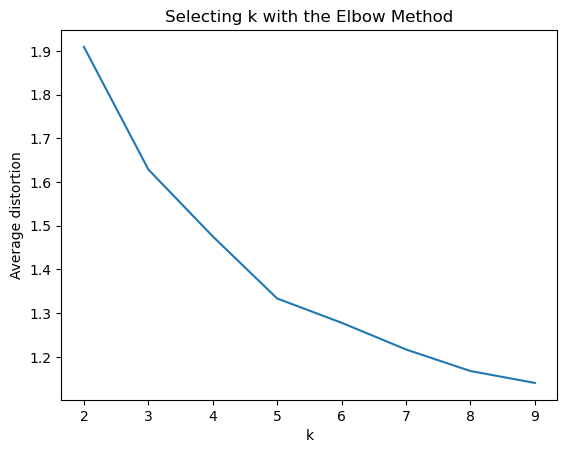

In [516]:
# QA 3 B:  Plot a visual and find elbow point.
sns.lineplot(x=clusters, y= meanDistortions) 
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

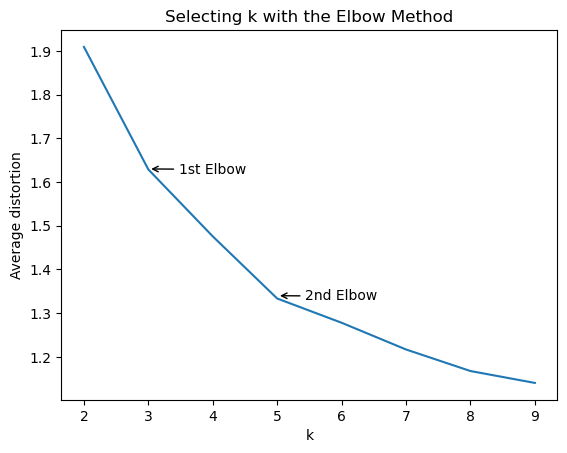

In [526]:
# QA 3 C:  On the above visual, highlight which are the possible Elbow points.
sns.lineplot(x=clusters, y= meanDistortions)
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.annotate('1st Elbow', xy=(3, 1.63),xytext=(4, 1.62) ,horizontalalignment="center",arrowprops={'arrowstyle':'->','lw':1})
plt.annotate('2nd Elbow', xy=(5, 1.34),xytext=(6, 1.33) ,horizontalalignment="center",arrowprops={'arrowstyle':'->','lw':1})
plt.show()


There are few bends in the charts, we can try k = 3 & k= 5 clusters.

In [527]:
# QA 3 D:  Train a K-means clustering model once again on the optimal number of clusters.
# We can first start with K = 3
car_df_scaled_3 = car_df_scaled.copy()
model_kmeans_3= KMeans(3)
model_kmeans_3.fit(car_df_scaled_3)
prediction= model_kmeans_3.predict(car_df_scaled_3)

#Append the prediction 
car_df_scaled_3["Group"] = prediction
print("Groups Assigned : \n")
car_df_scaled_3.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,1
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,1
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,1
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,1
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,1


In [528]:
car_df_scaled_3.groupby(['Group']).mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group,,,,,,,,
0,-0.230151,-0.122552,-0.053978,-0.247894,0.025422,0.436619,0.087295,-0.604489
1,-1.120060,1.472207,1.453998,1.458836,1.354828,-1.023585,-0.606026,-0.716641
2,0.896957,-0.823404,-0.869313,-0.710149,-0.873358,0.278542,0.308129,0.956359


array([[<Axes: title={'center': 'acc'}, xlabel='[Group]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Group]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Group]'>,
        <Axes: title={'center': 'hp'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[Group]'>,
        <Axes: title={'center': 'origin'}, xlabel='[Group]'>,
        <Axes: title={'center': 'wt'}, xlabel='[Group]'>,
        <Axes: title={'center': 'yr'}, xlabel='[Group]'>]], dtype=object)

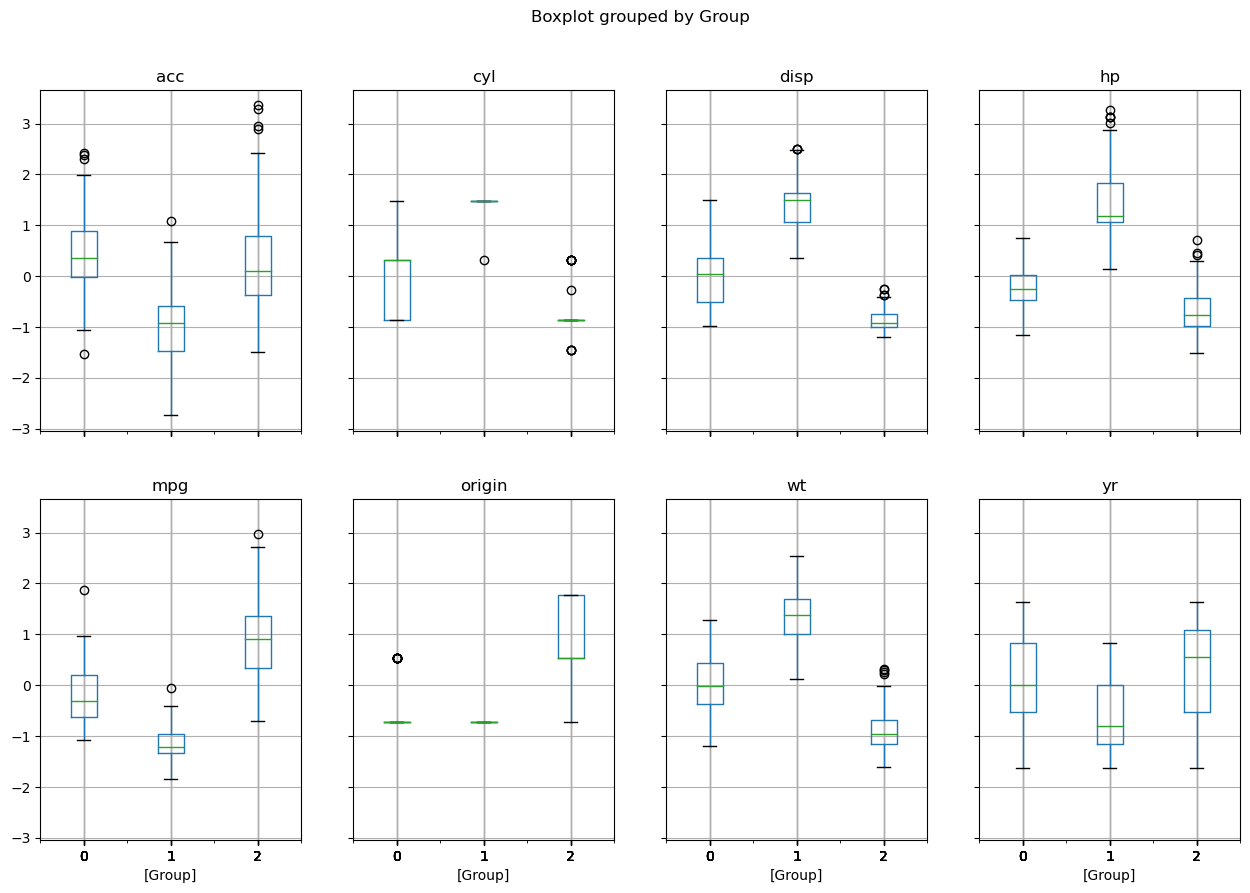

In [529]:
car_df_scaled_3.boxplot(by='Group', layout = (2,4),figsize=(15,10))

In [530]:
# Now, lets try with K = 5
car_df_scaled_5= car_df_scaled.copy()
model_kmeans_5= KMeans(5)
model_kmeans_5.fit(car_df_scaled_5)
prediction= model_kmeans_5.predict(car_df_scaled_5)

#Append the prediction 
car_df_scaled_5["Group"] = prediction
print("Groups Assigned : \n")
car_df_scaled_5.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,2
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,2
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,2
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,2
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,2


In [531]:
car_df_scaled_5.groupby(['Group']).mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group,,,,,,,,
0,0.149908,-0.835725,-0.819852,-0.491417,-0.738321,0.192703,-0.718189,0.676144
1,-0.559929,0.442040,0.377479,-0.064562,0.384632,0.394206,-0.069201,-0.670028
2,-1.156649,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-0.716641
3,0.707383,-0.746616,-0.595565,-0.570493,-0.502496,0.356308,0.992428,-0.621024
4,1.358529,-0.813700,-0.905971,-0.837200,-0.966061,0.435036,0.925820,1.503044


array([[<Axes: title={'center': 'acc'}, xlabel='[Group]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Group]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Group]'>,
        <Axes: title={'center': 'hp'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[Group]'>,
        <Axes: title={'center': 'origin'}, xlabel='[Group]'>,
        <Axes: title={'center': 'wt'}, xlabel='[Group]'>,
        <Axes: title={'center': 'yr'}, xlabel='[Group]'>]], dtype=object)

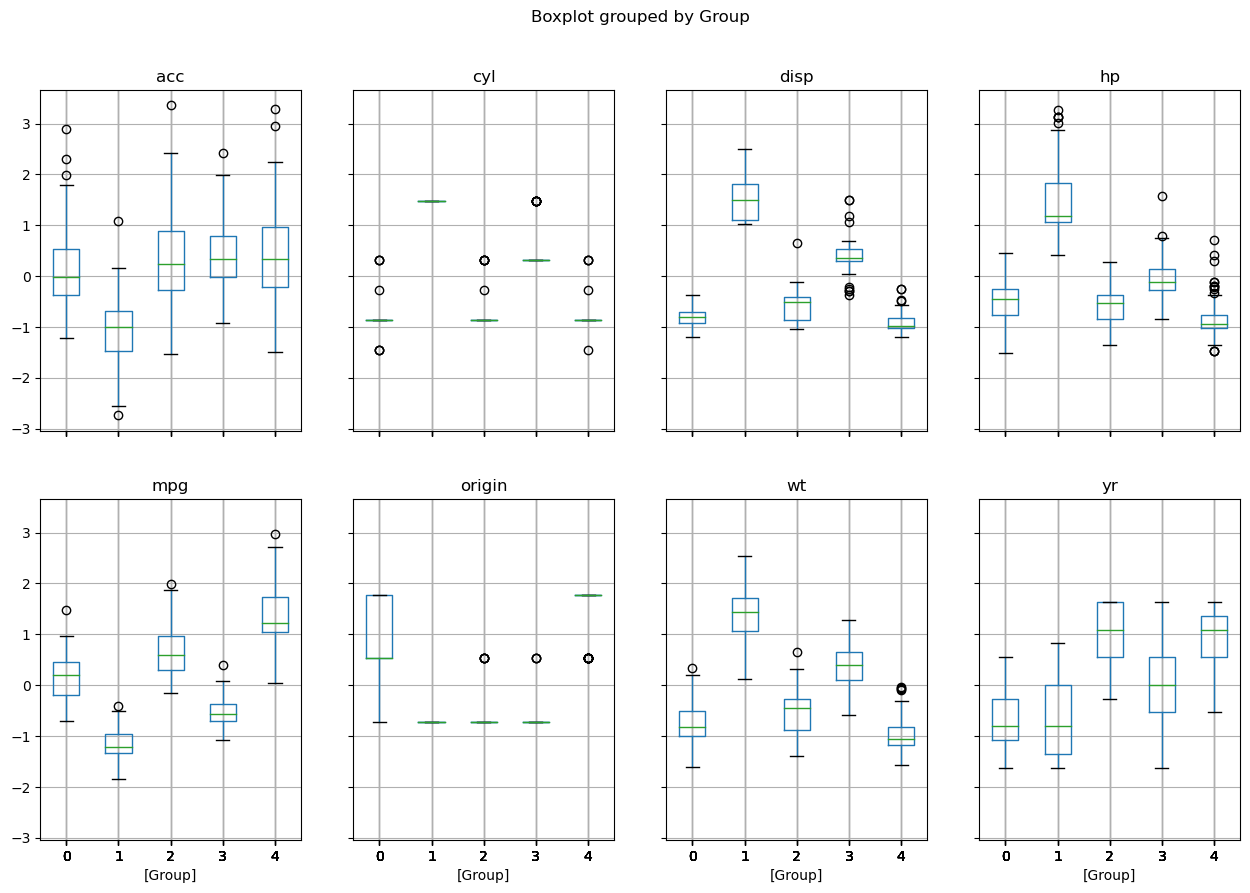

In [217]:
car_df_scaled_5.boxplot(by='Group', layout = (2,4),figsize=(15,10))

By finding means of groups & the above box plots, it seems that 3 cluster are the ideal number of clusters. \
The 3 clusters are quite different from each other and don't overlap where as in 5 clusters groups are quite overlapping. Hence, for further questions, I will consider car_df_scaled_3 dataframe where we have three clusters.

In [532]:
# QA 3 E:  Add a new feature in the DataFrame which will have labels based upon cluster value.
#Already created column 'Group' which shows the cluster, still creating another column 'Category' to give it a better label.
# The Group 0 will have category as 'First', Group 1 as 'Second' & Group 2 as 'Third'.

car_df_scaled_3 = car_df_scaled_3.assign(Category= np.select([car_df_scaled_3.Group ==0,car_df_scaled_3.Group == 1], ['First', 'Second'], 'Third'))
car_df_scaled_3.head()                

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group,Category
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,1,Second
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,1,Second
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,1,Second
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,1,Second
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,1,Second


<Axes: xlabel='wt', ylabel='mpg'>

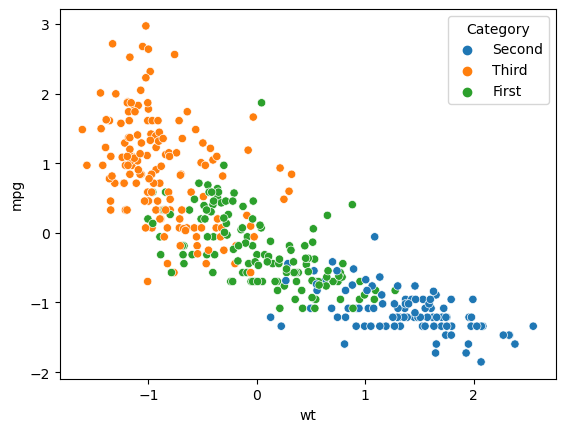

In [533]:
# QA 3 F:  Plot a visual and color the datapoints based upon clusters.
sns.scatterplot(car_df_scaled_3,x= 'wt', y= 'mpg', hue= 'Category')

The plot clearly shows the difference in the clusters 'First', 'Second' & 'Third'. Though there is slight overlap between the clusters near the end of one cluster & begining of another cluster, but its fine for this problem statement. \
This clearly shows that the cars with higher weight have lower mpg and vice versa. This also shows that model has done a pretty good job in grouping the similar cars based on different features.

In [534]:
# QA 3 G:  Pass a new DataPoint and predict which cluster it belongs to.
#creating a dummy entry with scaled values and run model to predict value
#Using Scaled value because if I run a zscore on normal values, it will just return NaN due to just 1 row.
new_entry = {'mpg': 0.77, 'cyl': 1.5, 'disp': 1.2, 'hp': 0.74,'wt': 0.65,'acc': -1.4, 'yr': -1.2,'origin': -.56}
new = pd.DataFrame([new_entry])
new

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0.77,1.5,1.2,0.74,0.65,-1.4,-1.2,-0.56


In [535]:
pred_new= model_kmeans_3.predict(new)
new['Group']= pred_new
new =new.assign(Category= np.select([new.Group ==0,new.Group == 1], ['First', 'Second'], 'Third'))
new

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group,Category
0,0.77,1.5,1.2,0.74,0.65,-1.4,-1.2,-0.56,1,Second


After running the Kmeans model on the new entry, it assigns the data point in the Group 0 that means it belongs to the 'First' Category of cars.

## Part B

### Problem Statement
• DOMAIN: Automobile 

• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

• All the features are numeric i.e. geometric features extracted from the silhouette. 

• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

#### Q1.  Data Understanding & Cleaning: [5 Marks]

A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

B. Check percentage of missing values and impute with correct approach. [1 Marks]

C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [536]:
# QB 1 A:  Read ‘vehicle.csv’ and save as DataFrame.
vehicle_df= pd.read_csv('vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [537]:
vehicle_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [538]:
# QB 1 B:  Check percentage of missing values and impute with correct approach.
#Checking % of missing values in each column
vehicle_df.isna().sum()/len(vehicle_df)*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [539]:
vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


I see that in most columns mean & median values are very similar i.e the data isn't skewed. Hence, i will prefer to impute the missingvalues with mean value of each column.

In [540]:
#Imputing the missing values with the mean
vehicle_df= vehicle_df.fillna(vehicle_df.mean())
vehicle_df.isna().sum()/len(vehicle_df)*100

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

<Axes: ylabel='class'>

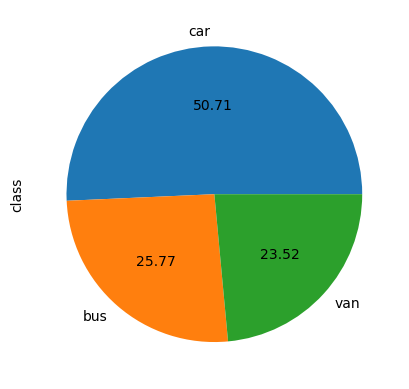

In [541]:
# QB 1 C:  Visualize a Pie-chart and print percentage of values for variable ‘class’.
vehicle_df['class'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

The pie chart shows that 50.71% of class is car where as the other two categories, bus & van contributes 25.77% & 23.52% respectively.

In [542]:
# QB 1 D:  Check for duplicate rows in the data and impute with correct approach.
vehicle_df.duplicated().sum()

0

There are no duplicate rows in the data.

#### Q2.  Data Preparation: [2 Marks]

A. Split data into X and Y. [Train and Test optional] [1 Marks]

B. Standardize the Data. [1 Marks]

In [543]:
# QB 2 A:  Split data into X and Y. [Train and Test optional].

X = vehicle_df.drop(["class"] , axis=1)
Y = vehicle_df.pop("class")

#Encode the label 'class' 
le = LabelEncoder()
Y_encoded= le.fit_transform(Y)

#not splitting the data into train & test as its optional
#x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1,stratify=Y)

In [544]:
# QB 2 B:  Standardize the Data.
X_scaled = X.apply(zscore)

#### Q3.  Model Building: [13 Marks]

A. Train a base Classification model using SVM. [1 Marks]

B. Print Classification metrics for train data. [1 Marks]

C. Apply PCA on the data with 10 components. [3 Marks]

D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

G. Train SVM model on components selected from above step. [1 Marks]

H. Print Classification metrics for train data of above model and share insights. [2 Marks]

In [545]:
# QB 3 A:  Train a base Classification model using SVM.

svm_model= svm.SVC()
svm_model.fit(X_scaled , Y_encoded)
Y_pred_svm = svm_model.predict(X_scaled)

In [546]:
# QB 3 B:  Print Classification metrics for train data.
#printing accuracy of the model
print("The accuracy of model in train data set is : {:.2f} % ". format((accuracy_score(Y_encoded, Y_pred_svm))*100))

The accuracy of model in train data set is : 98.11 % 


In [547]:
#printing classification report
print("The classification report of model is as below \n \n",classification_report(Y_encoded, Y_pred_svm))

The classification report of model is as below 
 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       218
           1       0.99      0.98      0.99       429
           2       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



<Axes: >

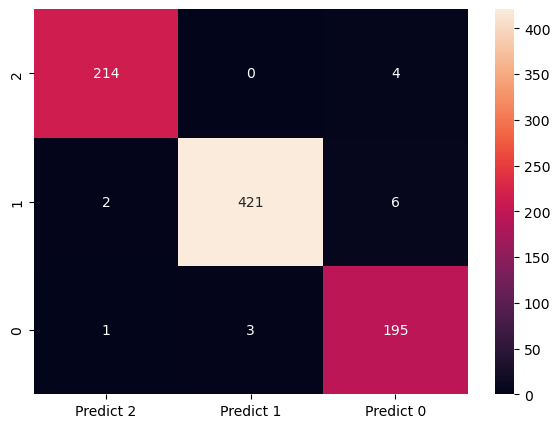

In [548]:
#calculating confusion matrix
cm=confusion_matrix(Y_encoded, Y_pred_svm)
df_cm = pd.DataFrame(cm, index = [i for i in ["2","1","0"]],columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt="d")

Accuracy, Precision, Recall & F1 score of the model are all ~98%. \
But as the number of variables is 18, it makes it complex and computationally expensive.

In [549]:
# QB 3 C:  Apply PCA on the data with 10 components.
#printing covariance between columns
covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [550]:
#Applying PCA
pca = PCA(n_components=10)
pca.fit(X_scaled)

PCA(n_components=10)

In [551]:
#printing eigen values & eigen vectors
print("The eigen values are \n \n",pca.explained_variance_)
print( "\n")
print("The eigen vectors are \n \n",pca.components_)
print( "\n")
print("The percentage of variation explained by each eigen vector are \n \n",pca.explained_variance_ratio_)

The eigen values are 
 
 [9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


The eigen vectors are 
 
 [[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.1

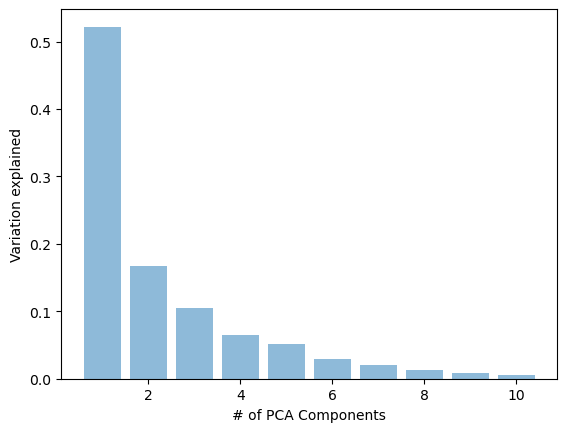

In [552]:
#visualizing to see the variation explained vs no of components.
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('# of PCA Components')
plt.show()

The chart above shows that ~55% of variation is explained by 1 component itself and ~80% of the variation is explained by 3 components.

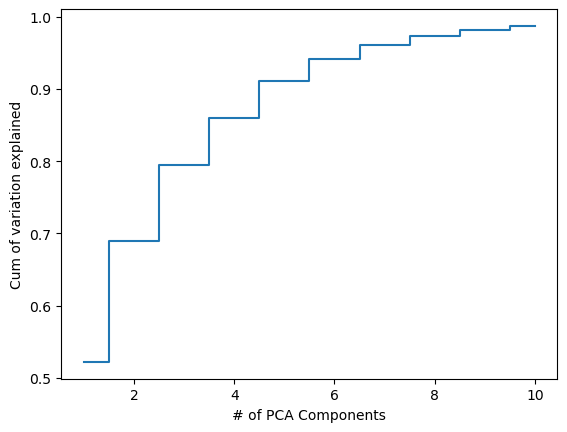

In [553]:
# QB 3 D:  Visualize Cumulative Variance Explained with Number of Components.
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

The cumulative chart shows that \
~70% of variation is explained by 2 components \
~80% of variation is explained by 3 components \
~92% of variation is explained by 6 components

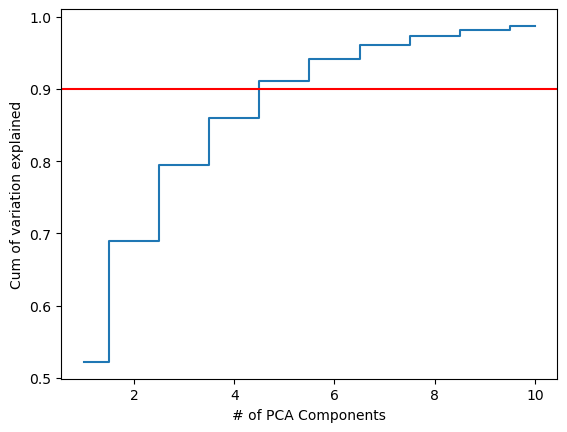

In [554]:
# QB 3 E:  Draw a horizontal line on the above plot to highlight the threshold of 90%.
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y=0.9, color='r')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

In [555]:
# QB 3 F:  Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.
#Applying PCA on 6 components as it explains variance of ~92%
pca6 = PCA(n_components=6)
pca6.fit(X_scaled)

PCA(n_components=6)

In [556]:
print("The eigen values are \n \n",pca6.explained_variance_)
print( "\n")
print("The eigen vectors are \n \n",pca6.components_)
print( "\n")

The eigen values are 
 
 [9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982]


The eigen vectors are 
 
 [[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03

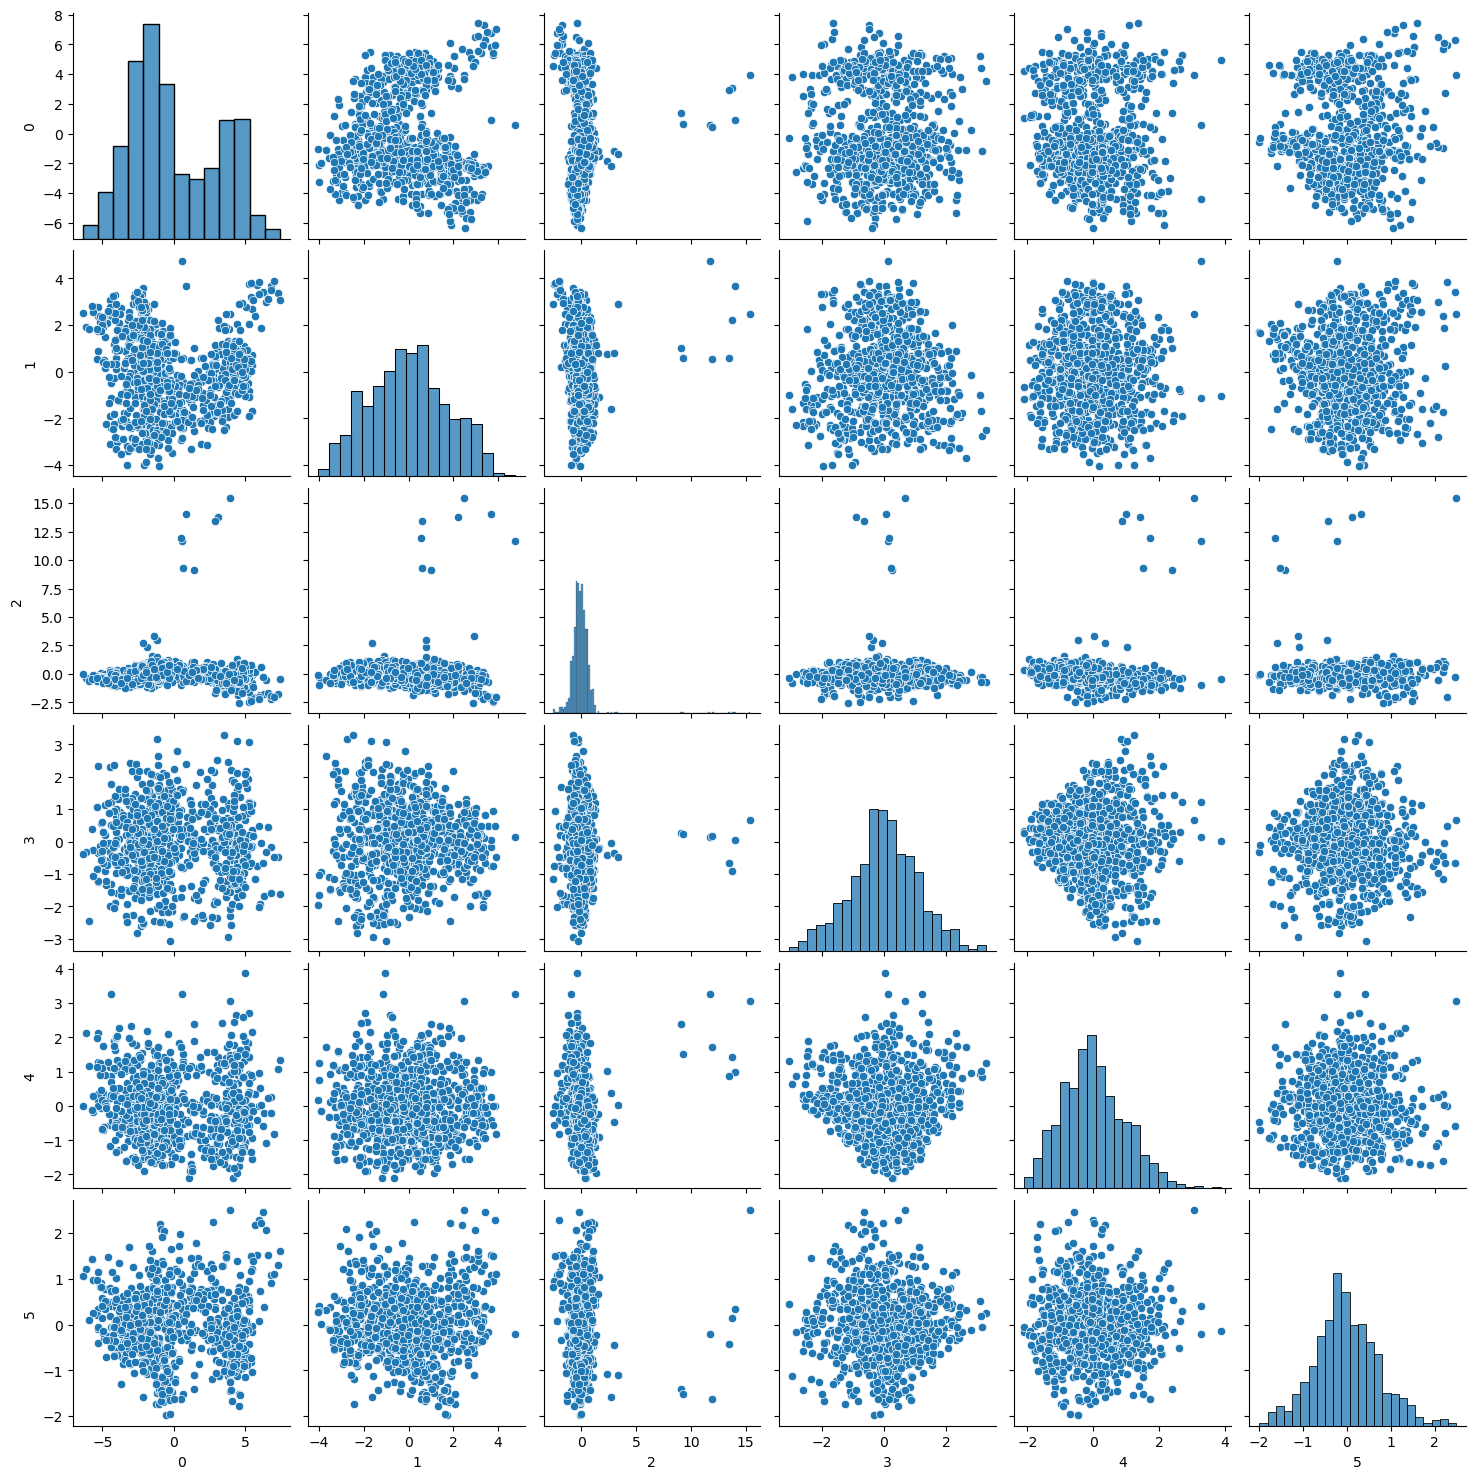

In [557]:
Xpca6 = pca6.transform(X_scaled)
#plotting pair plot to see the correlation between the indepenedent components created after dimensionality reduction
sns.pairplot(pd.DataFrame(Xpca6)) 

The pairplot shows that there is no correlation between the independent variables.

In [558]:
# QB 3 G:  Train SVM model on components selected from above step.
svm_pca= svm.SVC()
svm_pca.fit(Xpca6 , Y_encoded)
Y_pred_svm_pca = svm_pca.predict(Xpca6)

In [559]:
# QB 3 H:  Print Classification metrics for train data of above model and share insights.
#printing accuracy of the model after pca is applied
print("The accuracy of model in data set is : {:.2f} % ". format((accuracy_score(Y_encoded, Y_pred_svm_pca))*100))

The accuracy of model in data set is : 90.66 % 


In [560]:
#printing classification report
print("The classification report of model is as below \n \n",classification_report(Y_encoded, Y_pred_svm_pca))

The classification report of model is as below 
 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       218
           1       0.92      0.92      0.92       429
           2       0.87      0.91      0.89       199

    accuracy                           0.91       846
   macro avg       0.90      0.90      0.90       846
weighted avg       0.91      0.91      0.91       846



<Axes: >

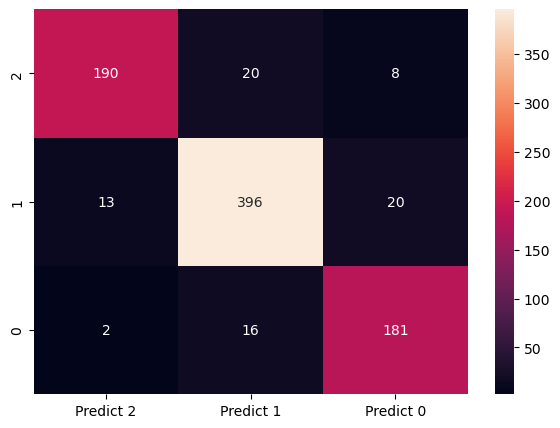

In [561]:
#calculating confusion matrix
cm=confusion_matrix(Y_encoded, Y_pred_svm_pca)
df_cm = pd.DataFrame(cm, index = [i for i in ["2","1","0"]],columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt="d")

The accuracy of the model with 6 independent components is ~ 91% (7% decline in accuracy). \
Similarly Precision, Recall & F1 score are all ~90% (reduced by 8%.) \
Though the performance has reduced a little and so has the complexity of the model and thus the computational expense has reduced.

#### Q4.  Performance Improvement: [5 Marks]

A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

B. Share best Parameters observed from above step. [1 Marks]

C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]

In [562]:
# QB 4 A:  Train another SVM on the components out of PCA. Tune the parameters to improve performance.
#Using Grid Search to find the best parameters
param_grid = {'C': [0.1,1,3,10, 100], 'gamma': [1,0.5,0.1,0.01,0.001]}
svm_tuned = GridSearchCV(svm.SVC(),param_grid,cv=5)
svm_tuned.fit(Xpca6 , Y_encoded)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 10, 100],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]})

In [563]:
#Printing the best parameters
print(svm_tuned.best_estimator_)

SVC(C=3, gamma=0.1)


In [564]:
svm_best= svm.SVC(gamma= 0.1,C=3)
svm_best.fit(Xpca6 , Y_encoded)
Y_pred_best = svm_best.predict(Xpca6)

In [565]:
# QB 4 B:  Share best Parameters observed from above step.

Used Grid Search technique for hyperparameter optimization, considered few hyperparameters, and tried every single possible combination of the hyperparameters, also used cross validation score as 5( cv= 5). \
After running the above, the best parameters came out to be C=3 & gamma=0.1

In [566]:
# QB 4 C:  Print Classification metrics for train data of above model and share relative improvement in performance 
#in all the models along with insights. 
#printing accuracy & classification report 
print("The accuracy of model is : {:.2f} % ". format((accuracy_score(Y_encoded, Y_pred_best))*100))
print("\n")
print("The classification report of model is as below \n \n",classification_report(Y_encoded, Y_pred_best))

The accuracy of model is : 94.21 % 


The classification report of model is as below 
 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       218
           1       0.95      0.94      0.95       429
           2       0.91      0.95      0.93       199

    accuracy                           0.94       846
   macro avg       0.94      0.94      0.94       846
weighted avg       0.94      0.94      0.94       846



<Axes: >

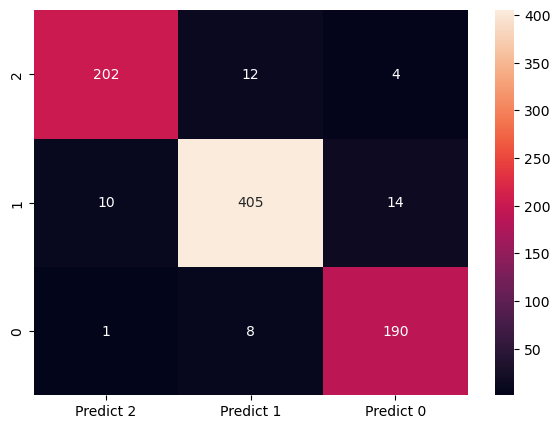

In [567]:
#calculating confusion matrix
cm=confusion_matrix(Y_encoded, Y_pred_best)
df_cm = pd.DataFrame(cm, index = [i for i in ["2","1","0"]],columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt="d")

##### Insights:
###### SVM Base model result:
Accuracy, Precision, Recall & F1 score of the model are all ~98%. This has 18 variables which results in complex model.

###### SVM model with PCA (6 components):
The accuracy of the model with 6 independent components is ~ 91% and Precision, Recall & F1 score are all ~90%. \
Here, the model will be less complex due to less no. of variables but performance is not very good.

###### SVM model with tuned parameters & PCA (6 components):
The accuracy,recall, precision & F1 score all around ~94%. Here, the performanceis good as well as the model is less complex due to just 6 independent variables.

We can see that after PCA and tuning parameters, the results are the best as it not only provides decent performance metrics, but also reduces the computational expense.

#### Q5.  Data Understanding & Cleaning: [5 Marks]

A. Explain pre-requisite/assumptions of PCA. [2 Marks]

B. Explain advantages and limitations of PCA. [3 Marks]

In [568]:
# QB 5 A:  Explain pre-requisite/assumptions of PCA.

###### Assumptions of PCA
PCA assumes a correlation between features. If the features are not correlated, PCA will be unable to determine principal components.

PCA is sensitive to the scaling. If two features are in different unit, PCA will be biased to the one which has higher weightage and that's why it’s important to standardize the data first.

PCA is not robust against outliers and is biased in datasets with outliers. Hence, outlier treeatment is necessary before applying PCA

PCA assumes a linear relationship between features. 

PCA often assume that the feature set has no missing values and thus missing value treatment is important before applying PCA.

In [569]:
# QB 5 B:  Explain advantages and limitations of PCA.

###### Advantage of PCA
It removes multi-collinearity to improve ML model performance by creating totally new independent components.

It decreases computational times for fitting models due to reduced number of components.

It makes visualization easier due to less number of components.

It decreases storage requirements as the components are less.

It avoids curse of dimensionality.

It helps reduce over fitting.

###### Limitations of PCA
The new variables are difficult to interpret.

We can loose some amount of information.

Data standardization, outlier treatment & missing value treatment is needed before applying PCA.